#### Credit Task-2

In [1]:
from sklearn.linear_model import Lasso,ElasticNet,Ridge
import warnings
warnings.simplefilter("ignore")
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sns.set()
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,ElasticNetCV
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
from sklearn.model_selection import KFold,StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

##### 1. What are the differences between hyperparameters and parameters of a machine learning (ML) model? Explain your answer using at least two machine learning models that you have learned in this unit.

##### Parameters

The objective of a typical learning algorithm is to find a function f that minimizes a certain loss over a dataset.The learning algorithm produces f through the optimization os a training criterion with respect to a set of **parameters**.These are the parameters in the model that must be determined using the training data set. These are the fitted parameters.<br>Model training typically starts with parameters being initialized to some values (random values or set to zeros). As training/learning progresses the initial values are updated using an optimization algorithm (e.g. gradient descent). The learning algorithm is continuously updating the parameter values as learning progress but hyperparameter values set by the model designer remain unchanged.

At the end of the learning process, model parameters are what constitute the model itself.<br><br>
Examples of parameters<br>
The coefficients (or weights) of linear and logistic regression models.<br>
Weights and biases of a nn<br>
The cluster centroids in clustering

##### Hyperparameters

Hyperparameters are parameters that are not directly learnt by the  learning algorithm.They are specified outside the training procedure.They control the capacity of the model i.e. how flexible the modelis to fit the data.They prevent overfitting.These are adjustable parameters that must be tuned in order to obtain a model with optimal performance.<br>Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning. The prefix ‘hyper_’ suggests that they are ‘top-level’ parameters that control the learning process and the model parameters that result from it<br>Anything in machine learning and deep learning that you decide their values or choose their configuration before training begins and whose values or configuration will remain the same when training ends is a hyperparameter<br><br>**Here are some common examples**<br>
Train-test split ratio<br>
Learning rate in optimization algorithms (e.g. gradient descent)<br>
Choice of optimization algorithm (e.g., gradient descent, stochastic gradient descent, or Adam optimizer)<br>
Choice of activation function in a neural network (nn) layer (e.g. Sigmoid, ReLU, Tanh)<br>
The choice of cost or loss function the model will use<br>
Number of clusters in a clustering task<br>
Kernel or filter size in convolutional layers<br>


For example, suppose you want to build a simple linear regression model using an m-dimensional training data set. Then your model can be written as:

where X is the predictor matrix, and w are the weights. Here w_0, w_1, w_2, …,w_m are the **model parameters**. If the model uses the gradient descent algorithm to minimize the objective function in order to determine the weights w_0, w_1, w_2, …,w_m, then we can have an optimizer such as GradientDescent(eta, n_iter). Here eta (learning rate) and n_iter (number of iterations) are the **hyperparameters** that would have to be adjusted in order to obtain the best values for the **model parameters** w_0, w_1, w_2, …,w_m.

Simply put, parameters in machine learning and deep learning are the values your learning algorithm can change independently as it learns and these values are affected by the choice of hyperparameters you provide. So you set the hyperparameters before training begins and the learning algorithm uses them to learn the parameters. Behind the training scene, parameters are continuously being updated and the final ones at the end of the training constitute your model.

Therefore, setting the right hyperparameter values is very important because it directly impacts the performance of the model that will result from them being used during model training.

In [2]:
df = pd.read_csv('yeast2vs4.csv')
df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,negative
1,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,negative
2,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,negative
3,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,negative
4,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,negative


In [3]:
def class_target(val):
    if val == 'negative':
        return 0
    else:
        return 1
df['class'] = df['class'].apply(class_target)
df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,0
1,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,0
2,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,0
3,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,0
4,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,0


In [4]:
X = df.drop('class',axis = 1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
logit = LogisticRegression()
# logit.fit(X_train,y_train)


param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'C' : [0.5,1],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
     'class_weight':[{0:1,1:10},{0:1,1:50},{0:1,1:40},{0:1,1:30}]
    }
]



logit = LogisticRegression()
grid = GridSearchCV(estimator=logit,scoring='accuracy',param_grid=param_grid,cv = 5,verbose=1)
grid.fit(X_train,y_train)

print(f"\nLogisticRegression Parameters learnt during training:\nCoeficient:{grid.best_estimator_.coef_[0]}\n")
print(f"LogisticRegression hyperparameters optimized during training:\n:{grid.best_params_}")

Fitting 5 folds for each of 80 candidates, totalling 400 fits

LogisticRegression Parameters learnt during training:
Coeficient:[  9.46729044   3.1974514  -19.31254145   0.15799067   3.21084749
   0.           0.           0.        ]

LogisticRegression hyperparameters optimized during training:
:{'C': 1, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'liblinear'}


<br>

In [5]:
import warnings
warnings.simplefilter('ignore')

X, y = load_boston(return_X_y=True)
df = pd.DataFrame(data = X)
df.head()
df['target_price'] = y
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
lasso = Lasso()
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(X_train, y_train)
print(f"\nLasso Parameters learnt during training:\nCoeficient:{lasso_model.best_estimator_.coef_[0]}\n")
print(f"\nLasso Parameters learnt during training:\Intercept:{lasso_model.best_estimator_.intercept_}\n")

print(f"Lasso hyperparameters optimized during training:\n:{lasso_model.best_params_}")


Lasso Parameters learnt during training:
Coeficient:-0.12786279767984887


Lasso Parameters learnt during training:\Intercept:32.643702456097536

Lasso hyperparameters optimized during training:
:{'alpha': 0.0031257158496882415}


In [8]:
df = pd.read_csv('yeast2vs4.csv')
# df.head()
df['class'] = df['class'].apply(class_target)
# df.head()
X = df.drop('class',axis = 1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
dt = DecisionTreeClassifier()
# fit the model

param_grid = {'max_depth':[2,3,4,5],
             'class_weight':[{0:1,1:10},{0:1,1:50},{0:1,1:100},'balanced'],
             'criterion':['gini','entropy']}

grid = GridSearchCV(dt,param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
# get importance
importance = grid.best_estimator_.feature_importances_
# summarize feature importance
print('Parameter learnt during training')
print(f"Features importance parameter learnt during:\n")
for col,val in zip(X.columns,importance):
    print(col,"->",val)
    
print(f"\nDecisionTree hyperparameters optimized during training:\n:{grid.best_params_}")

Parameter learnt during training
Features importance parameter learnt during:

mcg -> 0.5773288416567178
gvh -> 0.018833717674627694
alm -> 0.3371038418313307
mit -> 0.0
erl -> 0.0
pox -> 0.0
vac -> 0.027412206073588696
nuc -> 0.039321392763734975

DecisionTree hyperparameters optimized during training:
:{'class_weight': {0: 1, 1: 10}, 'criterion': 'gini', 'max_depth': 5}


##### 2. Prove that Elastic net can be used as either LASSO or Ridge regulariser

Elastic net is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions.

With a single input variable, this relationship is a line, and with higher dimensions, this relationship can be thought of as a hyperplane that connects the input variables to the target variable. The coefficients of the model are found via an optimization process that seeks to minimize the sum squared error between the predictions (yhat) and the expected target values (y).

loss = sum i=0 to n (y_i – yhat_i)^2<br>
A problem with linear regression is that estimated coefficients of the model can become large, making the model sensitive to inputs and possibly unstable. This is particularly true for problems with few observations (samples) or more samples (n) than input predictors (p) or variables (so-called p >> n problems).<br>

One approach to addressing the stability of regression models is to change the loss function to include additional costs for a model that has large coefficients. Linear regression models that use these modified loss functions during training are referred to collectively as penalized linear regression.<br>

One popular penalty is to penalize a model based on the sum of the squared coefficient values. This is called an L2 penalty. An L2 penalty minimizes the size of all coefficients, although it prevents any coefficients from being removed from the model.<br>

l2_penalty = sum j=0 to p beta_j^2<br>
Another popular penalty is to penalize a model based on the sum of the absolute coefficient values. This is called the L1 penalty. An L1 penalty minimizes the size of all coefficients and allows some coefficients to be minimized to the value zero, which removes the predictor from the model.<br>

l1_penalty = sum j=0 to p abs(beta_j)<br>
Elastic net is a penalized linear regression model that includes both the L1 and L2 penalties during training.

Elastic net has two parameters alpha and l1_ratio.<br>Elastic net is basically a combination of both L1 and L2 regularization<br> So it uses both L1 and L2 penality term<br>We need to define alpha and l1_ratio while defining the model. Alpha and l1_ratio are the parameters which you can set accordingly if you wish to control the L1 and L2 penalty separately.

Actually, we have

Alpha = a + b           and     l1_ratio =  a / (a+b)

where, a and b weights assigned to L1 and L2 term respectively. So when we change the values of alpha and l1_ratio, a and b are set aaccordingly such that they control trade off between L1 and L2 as:

a * (L1 term) + b* (L2 term)

Let alpha (or a+b) = 1, and now consider the following cases:

If l1_ratio =1, therefore if we look at the formula of l1_ratio, we can see that l1_ratio can only be equal to 1 if a=1, which implies b=0. Therefore, it will be a lasso penalty.<br>
Similarly if l1_ratio = 0, implies a=0. Then the penalty will be a ridge penalty.<br>
For l1_ratio between 0 and 1, the penalty is the combination of ridge and lasso.

Now we implement Elastic Net & Lasso regresion separately on same dataset by controlling the l1_ratio value and check if it is giving same results or not

In [9]:
# datasets.load_boston()
import warnings
from sklearn.datasets import load_boston
import warnings
warnings.simplefilter('ignore')

X, y = load_boston(return_X_y=True)
df = pd.DataFrame(data = X)
df.head()
df['target_price'] = y
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# Implementing Lasso regression
lass = Lasso(random_state=1)
lass.fit(X,y)
print(f"R2_score using Lasso: {lass.score(X,y)}\n")
print(f"Coeficients of predictor variables using Lasso Regression:\n{lass.coef_}\n")
print(f"Intercept using Lasso Regression:\n{lass.intercept_}")

R2_score using Lasso: 0.6825842212709925

Coeficients of predictor variables using Lasso Regression:
[-0.06343729  0.04916467 -0.          0.         -0.          0.9498107
  0.02090951 -0.66879     0.26420643 -0.01521159 -0.72296636  0.00824703
 -0.76111454]

Intercept using Lasso Regression:
41.056933744993366


In [11]:
# Implementing ElasticNet regression with l1_ratio = 1
elas_net_lasso = ElasticNet(random_state=1,l1_ratio=1)
elas_net_lasso.fit(X,y)
print(f"R2_score using ElasticNet: {elas_net_lasso.score(X,y)}\n")
print(f"Coeficients of predictor variables using ElasticNet Regression with l1_ratio 1:\n{elas_net_lasso.coef_}\n")
print(f"Intercept using using ElasticNet Regression with l1_ratio 1:\n{elas_net_lasso.intercept_}")

R2_score using ElasticNet: 0.6825842212709925

Coeficients of predictor variables using ElasticNet Regression with l1_ratio 1:
[-0.06343729  0.04916467 -0.          0.         -0.          0.9498107
  0.02090951 -0.66879     0.26420643 -0.01521159 -0.72296636  0.00824703
 -0.76111454]

Intercept using using ElasticNet Regression with l1_ratio 1:
41.056933744993366


In [12]:
print(f"R2_score of Lasso & ElasticNet with l1_ratio 1:{lass.score(X,y) == elas_net_lasso.score(X,y)}")
print(f"R2_score of Lasso ->{lass.score(X,y)}")
print(f"R2_score of ElasticNet with l1_ratio 1->{elas_net_lasso.score(X,y)}\n")
print(f"Coefficients of ElasticNet with l1_ratio 1 & Coefficients of Lasso ->\n{lass.coef_ == elas_net_lasso.coef_}")
print(f"Coefficients of ElasticNet with l1_ratio 1 ->\n{elas_net_lasso.coef_}")
print(f"Coefficients of  of Lasso ->\n{lass.coef_}")

R2_score of Lasso & ElasticNet with l1_ratio 1:True
R2_score of Lasso ->0.6825842212709925
R2_score of ElasticNet with l1_ratio 1->0.6825842212709925

Coefficients of ElasticNet with l1_ratio 1 & Coefficients of Lasso ->
[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
Coefficients of ElasticNet with l1_ratio 1 ->
[-0.06343729  0.04916467 -0.          0.         -0.          0.9498107
  0.02090951 -0.66879     0.26420643 -0.01521159 -0.72296636  0.00824703
 -0.76111454]
Coefficients of  of Lasso ->
[-0.06343729  0.04916467 -0.          0.         -0.          0.9498107
  0.02090951 -0.66879     0.26420643 -0.01521159 -0.72296636  0.00824703
 -0.76111454]


By Controlling the l1_ratio parameter, ElasticNet can be used as Lasso or Ridge Regression

<br>

<br>

**Background**

The recently started human and other genome projects are likely to change the situation of molecular biology. Comprehensive analyses of whole genomic sequences will enable us to understand the general mechanisms of how protein and nucleic acid functions are encoded in the sequence data

**Dataset filename**:yeast2vs4.csv

**Dataset description** There are 8 features and one target in the dataset. All the features are in a numerical format, and the target is in text format.

<br>

**3. Analyse the importance of the features for predicting presence or absence of protein using two different approaches. Explain the similarity/difference between outcomes**

**Feature importance** refers to techniques that assign a score to input features based on how useful they are at predicting a target variable<br>There are many types and sources of feature importance scores, although popular examples include statistical correlation scores, coefficients calculated as part of linear models, decision trees, and permutation importance scores.<br>Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.

Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.

Feature importance scores can be calculated for problems that involve predicting a numerical value, called regression, and those problems that involve predicting a class label, called classification.

**Feature importance scores can provide insight into the dataset.** The relative scores can highlight which features may be most relevant to the target, and the converse, which features are the least relevant. This may be interpreted by a domain expert and could be used as the basis for gathering more or different data.

**Feature importance scores can provide insight into the model.** Most importance scores are calculated by a predictive model that has been fit on the dataset. Inspecting the importance score provides insight into that specific model and which features are the most important and least important to the model when making a prediction. This is a type of model interpretation that can be performed for those models that support it.<br>

**Feature importance can be used to improve a predictive model.** This can be achieved by using the importance scores to select those features to delete (lowest scores) or those features to keep (highest scores). This is a type of feature selection and can simplify the problem that is being modeled, speed up the modeling process (deleting features is called dimensionality reduction), and in some cases, improve the performance of the model.

We will look at two main types of  feature importance; they are:<br>

**Feature importance from model coefficients.**<br>
**Feature importance from decision trees**<br><br>

**Coefficients as Feature Importance**<br>Linear machine learning algorithms fit a model where the prediction is the weighted sum of the input values.

Examples include linear regression, logistic regression, and extensions that add regularization, such as ridge regression and the elastic net.

All of these algorithms find a set of coefficients to use in the weighted sum in order to make a prediction. These coefficients can be used directly as a crude type of feature importance score.

Let’s take a  look at using coefficients as feature importance for classification . We will fit a model on the dataset to find the coefficients, then summarize the importance scores for each input feature and finally create a bar chart to get an idea of the relative importance of the features.

**Logistic Regression Feature Importance**<br>
We can fit a LogisticRegression model on the regression dataset and retrieve the coeff_ property that contains the coefficients found for each input variable.

These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model.


<br>

**Univariate Analysis**<br>
Uni means one and variate means variable, so in univariate analysis, there is only one dependable variable. The objective of univariate analysis is to derive the data, define and summarize it, and analyze the pattern present in it. In a dataset, it explores each variable separately. It is possible for two kinds of variables- Categorical and Numerical.

Some patterns that can be easily identified with univariate analysis are Central Tendency (mean, mode and median), Dispersion (range, variance), Quartiles (interquartile range), and Standard deviation.

**Bivariate Analysis**<br>
Bi means two and variate means variable, so here there are two variables. The analysis is related to cause and the relationship between the two variables

<br>

In [13]:
df = pd.read_csv('yeast2vs4.csv')
df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,negative
1,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,negative
2,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,negative
3,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,negative
4,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,negative


In [14]:
def class_target(val):
    if val == 'negative':
        return 0
    else:
        return 1
df['class'] = df['class'].apply(class_target)
df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,0
1,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,0
2,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,0
3,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,0
4,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,0


Checking different features for **univariate analysis with their distributions**

<Axes: xlabel='mcg', ylabel='Count'>

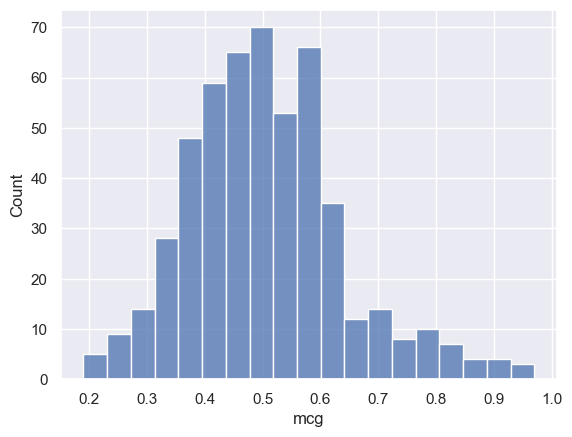

In [15]:
sns.histplot(data = df,x = 'mcg')

<Axes: xlabel='gvh', ylabel='Count'>

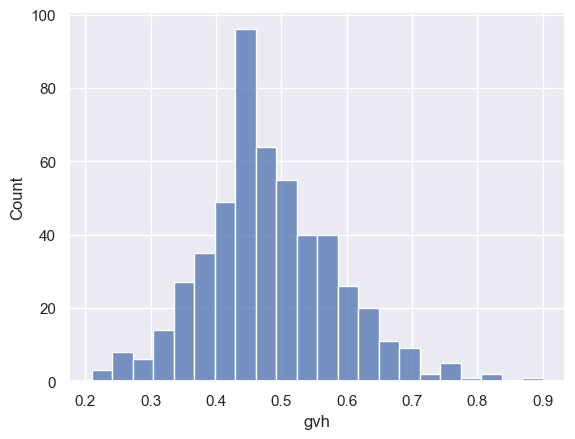

In [16]:
sns.histplot(data = df,x = 'gvh')

<Axes: xlabel='alm', ylabel='Count'>

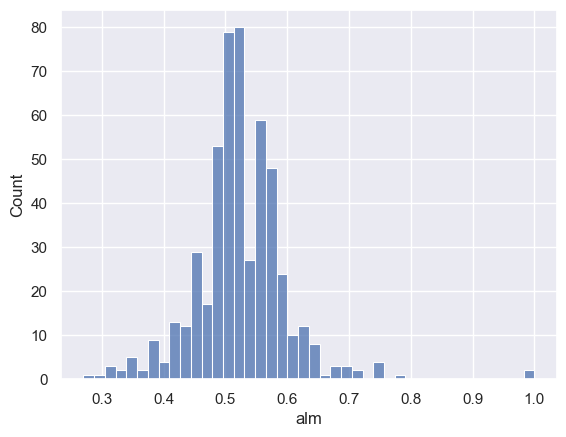

In [17]:
sns.histplot(data = df,x = 'alm')

<Axes: xlabel='mit', ylabel='Count'>

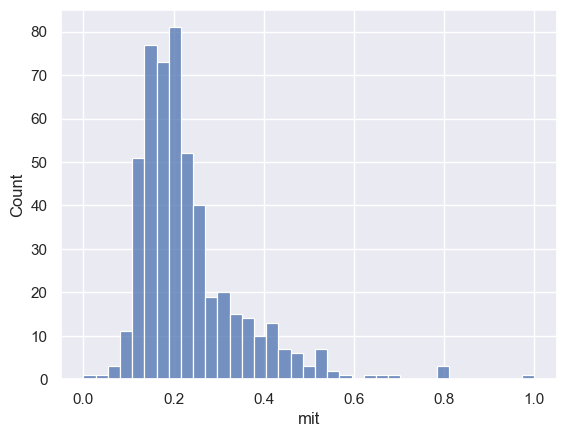

In [18]:
sns.histplot(data = df,x = 'mit')

<Axes: xlabel='nuc', ylabel='Count'>

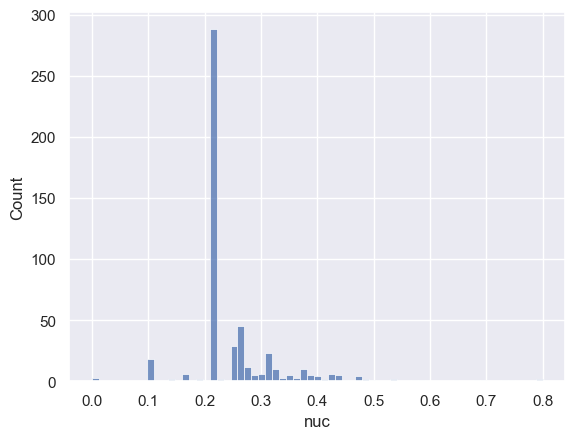

In [19]:
sns.histplot(data = df,x = 'nuc')

Above plots shows that most features are following normal distribution

<br>

Checking a correlation plot using heatmap to check correlation among features and target variable

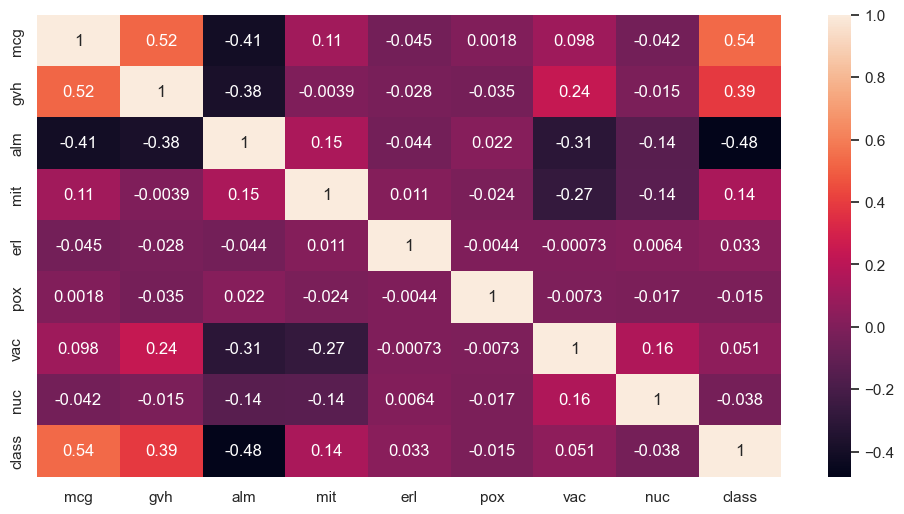

In [20]:
# sns.pairplot(df)
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [21]:
X = df.drop('class',axis = 1)
y = df['class']

logit = LogisticRegression()
logit.fit(X,y)

LogisticRegression()

In [22]:
importance = logit.coef_[0]

In [23]:
print(f"Features with importance value:\n")
for col,val in zip(X.columns,importance):
    print(col,"->",val)
    

Features with importance value:

mcg -> 4.729325567115505
gvh -> 2.445289776038172
alm -> -3.256870321171561
mit -> 1.0754892658969848
erl -> 0.3264955899802425
pox -> -0.025281621064621163
vac -> 0.1576027820763182
nuc -> -0.2694625861886729


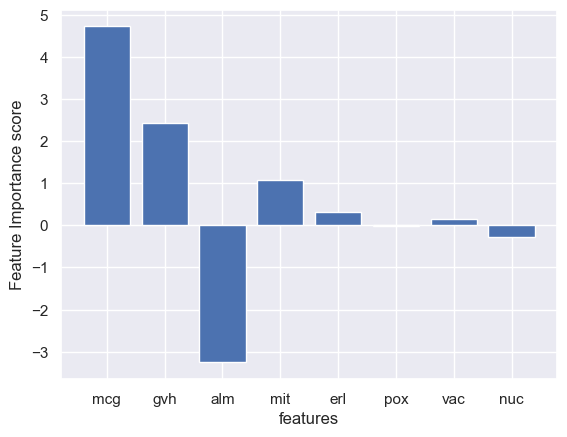

In [24]:
plt.bar([col for col in X.columns], importance)
plt.xlabel("features")
plt.ylabel('Feature Importance score')
plt.show()

The coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

<br>

<br>

**Decision Tree Feature Importance**


Decision tree algorithms like classification and regression trees (CART) offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

This same approach can be used for ensembles of decision trees, such as the random forest and stochastic gradient boosting algorithms.

We can use the CART algorithm for feature importance implemented in scikit-learn as the DecisionTreeRegressor and DecisionTreeClassifier classes.

After being fit, the model provides a feature_importances_ property that can be accessed to retrieve the relative importance scores for each input feature.

In [25]:
dt = DecisionTreeClassifier()
# fit the model
dt.fit(X, y)
# get importance
importance = dt.feature_importances_
# summarize feature importance
print(f"Features with importance value:\n")
for col,val in zip(X.columns,importance):
    print(col,"->",val)


Features with importance value:

mcg -> 0.26975338524088105
gvh -> 0.018139725292564836
alm -> 0.5561906153636381
mit -> 0.046896525094601446
erl -> 0.0
pox -> 0.0
vac -> 0.08634509239260861
nuc -> 0.02267465661570604


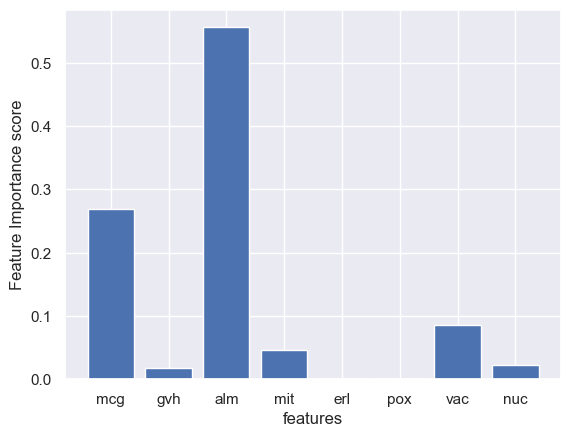

In [26]:
plt.bar([col for col in X.columns], importance)
plt.xlabel("features")
plt.ylabel('Feature Importance score')
plt.show()

**Feature Selection with Importance**<br>Feature importance scores can be used to help interpret the data, but they can also be used directly to help rank and select features that are most useful to a predictive model.


In [27]:
# roc_auc_score

In [28]:
# Running decision tree with all features
from sklearn.metrics import accuracy_score,roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_prob = dt.predict_proba(X_test)
print(f"roc_auc on test with all features:\n{roc_auc_score(y_test,y_pred_prob[:,1])}")

roc_auc on test with all features:
0.8835227272727273


From above feature importance , we remove the features having very less importance and then use these features in predicting

In [29]:
X_reduced = X[['mcg','alm','mit','vac','nuc']]
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, random_state=42)
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_prob = dt.predict_proba(X_test)
print(f"roc_auc on test with reduced features:\n{roc_auc_score(y_test,y_pred_prob[:,1])}")

roc_auc on test with reduced features:
0.9460227272727274


roc_auc_score is improved with reduced features

<br>

<br>

##### 4. Create three supervised machine learning (ML) models except any ensemble approach for predicting presence or absence of protein

Here , 3 different machine learning models are created except any ensemble approch<br>They are :-<br>DecisionTreeClassifier<br>LogisticRegression<br>SupportVectorClassifier

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,VotingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             plot_confusion_matrix,
                             roc_auc_score,f1_score,
                             roc_curve,precision_recall_curve,plot_precision_recall_curve,
                             auc)
from sklearn.tree import DecisionTreeClassifier
from feature_engine.selection import DropConstantFeatures,DropDuplicateFeatures,DropCorrelatedFeatures

In [31]:
# Loading the dataset
df = pd.read_csv('yeast2vs4.csv')
df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,negative
1,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,negative
2,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,negative
3,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,negative
4,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,negative


In [32]:
# checking the shape of dataset
df.shape

(514, 9)

In [33]:
mapping = {'negative':0,'positive':1}
df['class'] = df['class'].map(mapping)

In [34]:
df['class'].value_counts(normalize=True) * 100

0    90.077821
1     9.922179
Name: class, dtype: float64

In [35]:
X = df.drop(columns=['class'])
y = df['class']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape , X_test.shape

((344, 8), (170, 8))

**a**. Report performance score using a suitable metric. Is it possible that the presented result is an overfitted one? Justify.

In [37]:
logit = LogisticRegression(penalty='l2')
logit.fit(X_train,y_train)
# print('train_set')
pred_test = logit.predict(X_test)
pred_probs_train = logit.predict_proba(X_train)
pred_probs_test = logit.predict_proba(X_test)
print(f"Logistic regression roc_auc_score on train set:{roc_auc_score(y_train,pred_probs_train[:,1])}")
print(f"Logistic regression roc_auc_score on test set:{roc_auc_score(y_test,pred_probs_test[:,1])}")
print(classification_report(y_test,pred_test))

Logistic regression roc_auc_score on train set:0.9125288950531669
Logistic regression roc_auc_score on test set:0.9163961038961038
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       154
           1       1.00      0.06      0.12        16

    accuracy                           0.91       170
   macro avg       0.96      0.53      0.54       170
weighted avg       0.92      0.91      0.87       170



In [38]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
# print('train_set')
pred_test = dt.predict(X_test)
pred_probs_train = dt.predict_proba(X_train)
pred_probs_test = dt.predict_proba(X_test)
print(f"DecisionTree roc_auc_score on train set:{roc_auc_score(y_train,pred_probs_train[:,1])}")
print(f"DecisionTree roc_auc_score on test set:{roc_auc_score(y_test,pred_probs_test[:,1])}")
print(classification_report(y_test,pred_test))

DecisionTree roc_auc_score on train set:1.0
DecisionTree roc_auc_score on test set:0.8835227272727273
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       154
           1       0.65      0.81      0.72        16

    accuracy                           0.94       170
   macro avg       0.81      0.88      0.84       170
weighted avg       0.95      0.94      0.94       170



In [39]:
svc = SVC(probability=True)
svc.fit(X_train,y_train)
# print('train_set')
pred_test = svc.predict(X_test)
pred_probs_train = svc.predict_proba(X_train)
pred_probs_test = svc.predict_proba(X_test)
print(f"SupportVectorClassifier roc_auc_score on train set:{roc_auc_score(y_train,pred_probs_train[:,1])}")
print(f"SupportVectorClassifier roc_auc_score on test set:{roc_auc_score(y_test,pred_probs_test[:,1])}")
print(classification_report(y_test,pred_test))

SupportVectorClassifier roc_auc_score on train set:0.9742024965325936
SupportVectorClassifier roc_auc_score on test set:0.9614448051948051
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       154
           1       0.91      0.62      0.74        16

    accuracy                           0.96       170
   macro avg       0.94      0.81      0.86       170
weighted avg       0.96      0.96      0.96       170



<br>

From all the above created models and checking the metrics such as recall_score , the models seems to overfit as we have class imbalanced dataset<br>

In [40]:
df['class'].value_counts(normalize=True) * 100

0    90.077821
1     9.922179
Name: class, dtype: float64

<br>

**b**. Justify different design decisions for each ML model used to answer this question

For each of the models created, Different design decisions are opted using Cost Sensitive learning as the dataset is facing Class imabalance<br>To optimize the results,class_weight parameters are designed differently either using<br>**'balanced'** or<br>assigning a **sample weight values assigned with cost for each class**<br>After that, metrics and classification report are analyzed for checking the overfitting/underfitting to make a generalized model

In [41]:
logit = LogisticRegression(penalty='l2',class_weight='balanced')
logit.fit(X_train,y_train)
# print('train_set')
pred_test = logit.predict(X_test)
pred_probs_train = logit.predict_proba(X_train)
pred_probs_test = logit.predict_proba(X_test)
print(f"Logistic regression roc_auc_score on train set:{roc_auc_score(y_train,pred_probs_train[:,1])}")
print(f"Logistic regression roc_auc_score on test set:{roc_auc_score(y_test,pred_probs_test[:,1])}")
print(classification_report(y_test,pred_test))

Logistic regression roc_auc_score on train set:0.9275080906148867
Logistic regression roc_auc_score on test set:0.9297889610389609
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       154
           1       0.50      0.81      0.62        16

    accuracy                           0.91       170
   macro avg       0.74      0.86      0.78       170
weighted avg       0.93      0.91      0.92       170



In [42]:
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train,y_train)
# print('train_set')
pred_test = dt.predict(X_test)
pred_probs_train = dt.predict_proba(X_train)
pred_probs_test = dt.predict_proba(X_test)
print(f"DecisionTree roc_auc_score on train set:{roc_auc_score(y_train,pred_probs_train[:,1])}")
print(f"DecisionTree roc_auc_score on test set:{roc_auc_score(y_test,pred_probs_test[:,1])}")
print(classification_report(y_test,pred_test))

DecisionTree roc_auc_score on train set:1.0
DecisionTree roc_auc_score on test set:0.862012987012987
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       154
           1       0.75      0.75      0.75        16

    accuracy                           0.95       170
   macro avg       0.86      0.86      0.86       170
weighted avg       0.95      0.95      0.95       170



In [43]:
svc = SVC(probability=True,class_weight='balanced')
svc.fit(X_train,y_train)
# print('train_set')
pred_test = svc.predict(X_test)
pred_probs_train = svc.predict_proba(X_train)
pred_probs_test = svc.predict_proba(X_test)
print(f"SupportVectorClassifier roc_auc_score on train set:{roc_auc_score(y_train,pred_probs_train[:,1])}")
print(f"SupportVectorClassifier roc_auc_score on test set:{roc_auc_score(y_test,pred_probs_test[:,1])}")
print(classification_report(y_test,pred_test))

SupportVectorClassifier roc_auc_score on train set:0.9856680536292187
SupportVectorClassifier roc_auc_score on test set:0.9728084415584414
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       154
           1       0.65      0.94      0.77        16

    accuracy                           0.95       170
   macro avg       0.82      0.94      0.87       170
weighted avg       0.96      0.95      0.95       170



In [44]:
logit = LogisticRegression(penalty='l2')
logit.fit(X_train,y_train,sample_weight=np.where(y_train ==1,10,1))
# print('train_set')
pred_test = logit.predict(X_test)
pred_probs_train = logit.predict_proba(X_train)
pred_probs_test = logit.predict_proba(X_test)
print(f"Logistic regression roc_auc_score on train set:{roc_auc_score(y_train,pred_probs_train[:,1])}")
print(f"Logistic regression roc_auc_score on test set:{roc_auc_score(y_test,pred_probs_test[:,1])}")
print(classification_report(y_test,pred_test))

Logistic regression roc_auc_score on train set:0.9363846509477578
Logistic regression roc_auc_score on test set:0.9354707792207793
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       154
           1       0.42      0.81      0.55        16

    accuracy                           0.88       170
   macro avg       0.70      0.85      0.74       170
weighted avg       0.93      0.88      0.89       170



In [45]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train,sample_weight=np.where(y_train ==1,10,1))
# print('train_set')
pred_test = dt.predict(X_test)
pred_probs_train = dt.predict_proba(X_train)
pred_probs_test = dt.predict_proba(X_test)
print(f"DecisionTree roc_auc_score on train set:{roc_auc_score(y_train,pred_probs_train[:,1])}")
print(f"DecisionTree roc_auc_score on test set:{roc_auc_score(y_test,pred_probs_test[:,1])}")
print(classification_report(y_test,pred_test))

DecisionTree roc_auc_score on train set:1.0
DecisionTree roc_auc_score on test set:0.862012987012987
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       154
           1       0.75      0.75      0.75        16

    accuracy                           0.95       170
   macro avg       0.86      0.86      0.86       170
weighted avg       0.95      0.95      0.95       170



In [46]:
svc = SVC(probability=True)
svc.fit(X_train,y_train,sample_weight=np.where(y_train ==1,10,1))
# print('train_set')
pred_test = svc.predict(X_test)
pred_probs_train = svc.predict_proba(X_train)
pred_probs_test = svc.predict_proba(X_test)
print(f"SupportVectorClassifier roc_auc_score on train set:{roc_auc_score(y_train,pred_probs_train[:,1])}")
print(f"SupportVectorClassifier roc_auc_score on test set:{roc_auc_score(y_test,pred_probs_test[:,1])}")
print(classification_report(y_test,pred_test))

SupportVectorClassifier roc_auc_score on train set:0.9892741562644475
SupportVectorClassifier roc_auc_score on test set:0.9780844155844156
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       154
           1       0.62      0.94      0.75        16

    accuracy                           0.94       170
   macro avg       0.81      0.94      0.86       170
weighted avg       0.96      0.94      0.95       170



**c**. Have you optimized any hyper-parameters for each ML model? What are they? Why have you done that? Explain.

Yes, Model hyperparameters are tuned for all the above created models.They are optimized to avoid overfitting as well as underfitting to create generalized model<br><br>DecisionTree<br>'max_depth':[2,3,4,5],<br>
             'class_weight':[{0:1,1:10},{0:1,1:50},{0:1,1:100},'balanced'],<br>
             'criterion':['gini','entropy']<br><br>LogisticRegression<br>    'penalty' : ['l1', 'l2'],
    'C' : [0.5,1],<br>
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],<br>
     'class_weight':[{0:1,1:10},{0:1,1:50},{0:1,1:40},{0:1,1:30}]<br><br><br>SupportVectorClassifier<br>'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],<br>
              'kernel': ['rbf', 'poly', 'sigmoid'],<br>
             'class_weight':[{0:1,1:10},{0:1,1:50},{0:1,1:40},{0:1,1:30}]<br>
    

In [47]:
param_grid = {'max_depth':[2,3,4,5],
             'class_weight':[{0:1,1:10},{0:1,1:50},{0:1,1:100},'balanced'],
             'criterion':['gini','entropy']}




dt = DecisionTreeClassifier()

grid = GridSearchCV(estimator=dt,scoring='roc_auc',param_grid=param_grid,cv = 5,verbose=1)
grid.fit(X_train,y_train)
# print('train_set')
pred_test = grid.predict(X_test)
# pred_probs_train = grid.predict_proba(X_train)
pred_probs_test = grid.predict_proba(X_test)
# print(f"DecisionTree roc_auc_score on train set:{roc_auc_score(y_train,pred_probs_train[:,1])}")
print(f"DecisionTree roc_auc_score on test set:{roc_auc_score(y_test,pred_probs_test[:,1])}")
print(classification_report(y_test,pred_test))
print(f"Best parameters::\n{grid.best_params_}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
DecisionTree roc_auc_score on test set:0.9780844155844156
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       154
           1       0.52      1.00      0.68        16

    accuracy                           0.91       170
   macro avg       0.76      0.95      0.81       170
weighted avg       0.95      0.91      0.92       170

Best parameters::
{'class_weight': {0: 1, 1: 10}, 'criterion': 'entropy', 'max_depth': 2}


In [48]:
param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'C' : [0.5,1],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
     'class_weight':[{0:1,1:10},{0:1,1:50},{0:1,1:40},{0:1,1:30}]
    }
]



logit = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=logit,scoring='roc_auc',param_grid=param_grid,cv = 5,verbose=1)
grid.fit(X_train,y_train)
# logit.fit(X_train,y_train,sample_weight=np.where(y_train ==1,10,1))
# print('train_set')
pred_test = grid.predict(X_test)
# pred_probs_train = logit.predict_proba(X_train)
pred_probs_test = grid.predict_proba(X_test)
# print(f"Logistic regression roc_auc_score on train set:{roc_auc_score(y_train,pred_probs_train[:,1])}")
print(f"Logistic regression roc_auc_score on test set:{roc_auc_score(y_test,pred_probs_test[:,1])}")
print(classification_report(y_test,pred_test))
print(f"Best parameters::\n{grid.best_params_}")

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Logistic regression roc_auc_score on test set:0.9669237012987013
              precision    recall  f1-score   support

           0       0.99      0.64      0.78       154
           1       0.21      0.94      0.35        16

    accuracy                           0.67       170
   macro avg       0.60      0.79      0.56       170
weighted avg       0.92      0.67      0.74       170

Best parameters::
{'C': 1, 'class_weight': {0: 1, 1: 40}, 'penalty': 'l1', 'solver': 'saga'}


In [49]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid'],
             'class_weight':[{0:1,1:10},{0:1,1:50},{0:1,1:40},{0:1,1:30}]}

svc = SVC(probability=True)
grid = GridSearchCV(estimator=svc,scoring='roc_auc',param_grid=param_grid,cv = 5,verbose=1)
grid.fit(X_train,y_train)
# svc.fit(X_train,y_train,sample_weight=np.where(y_train ==1,10,1))
# print('train_set')
pred_test = grid.predict(X_test)
# pred_probs_train = svc.predict_proba(X_train)
pred_probs_test = grid.predict_proba(X_test)
# print(f"SupportVectorClassifier roc_auc_score on train set:{roc_auc_score(y_train,pred_probs_train[:,1])}")
print(f"SupportVectorClassifier roc_auc_score on test set:{roc_auc_score(y_test,pred_probs_test[:,1])}")
print(classification_report(y_test,pred_test))
print(f"Best parameters::\n{grid.best_params_}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
SupportVectorClassifier roc_auc_score on test set:0.9809253246753247
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       154
           1       0.65      0.94      0.77        16

    accuracy                           0.95       170
   macro avg       0.82      0.94      0.87       170
weighted avg       0.96      0.95      0.95       170

Best parameters::
{'C': 10, 'class_weight': {0: 1, 1: 10}, 'gamma': 1, 'kernel': 'rbf'}


From above hypertuning , SupportVectorClassifier gives optimal performance metric results

**d**. Finally, make a recommendation based on the reported results and justify it.

The given dataset is facing class imbalanced issue as the positive (1) class has very few instances compared to negative(0) instances<br>->3 Machine learning models are created<br>->All three models seems to overfit initially<br><br> Therefore Cost sensitive learning is applied on all three machine learning models<br>
There is a subfield of machine learning that is focused on learning and using models on data that have uneven penalties or costs when making predictions and more<br>In cost-sensitive learning, a penalty associated with an incorrect prediction and is referred to as a “cost.”

After applying the above methods,**SupportVectorClassifier** gives below optimal performance metric results

In [50]:
print(f"SupportVectorClassifier roc_auc_score on test set:{roc_auc_score(y_test,pred_probs_test[:,1])}")
print(classification_report(y_test,pred_test))
print(f"Best parameters::\n{grid.best_params_}")

SupportVectorClassifier roc_auc_score on test set:0.9809253246753247
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       154
           1       0.65      0.94      0.77        16

    accuracy                           0.95       170
   macro avg       0.82      0.94      0.87       170
weighted avg       0.96      0.95      0.95       170

Best parameters::
{'C': 10, 'class_weight': {0: 1, 1: 10}, 'gamma': 1, 'kernel': 'rbf'}


Imbalanced classes in a dataset are often usual among classification problems in machine learning. Balancing an imbalanced class is crucial as the classification model, which is trained using the imbalanced class dataset will tend to exhibit the prediction accuracy according to the highest class of the dataset

Below here, listed down the ways we can manage the imbalanced classes in the dataset.

**Changing Performance Metric**<br>
Performance metrics play a fundamental role while building a machine learning model. Implying the incorrect performance metric on an imbalance dataset can yield wrong outcomes. For instance, although accuracy is considered to be an important metric for evaluating the performance of a machine learning model, sometimes it can be misleading in case of an imbalanced dataset. In such circumstances, one must use other performance metrics such as Recall, F1-Score, False Positive Rate (FPR), Precision, Area Under ROC Curve (AUROC), among others.<br><br>**The More Data, The Better**
Machine learning models are data-hungry. In most cases, researchers spend most of their time in tasks like data cleaning, analysing, visualising, among others during an end-to-end machine learning process and contribute less time in data collection. While all of these steps are important, often the collection of data gets limited to certain numbers. To avoid such circumstances, one must add more data into the dataset. Collecting more data with relevant examples of the undersampled class of the dataset will help to overcome the issue.<br><br>**Experiment With Different Algorithms**<br>
Another way to handle and manage imbalanced dataset is to try different algorithms rather than sticking to one particular algorithm. Experimenting with different algorithms provides a probability to check how the algorithms are performing by a particular dataset.<br><br>**Resampling of Dataset**<br>
To deal with the imbalanced dataset, researchers have introduced a number of resampling techniques. One of the benefits of using these techniques is that they are external approaches using the existing algorithms. They can be easily transportable in case of both undersampling and oversampling.

Some of the popular resampling methods are as follows-

Random Oversampling: Oversampling seeks to increase the number of minority class members in the training set. Random oversampling is a simple approach to resampling, where one chooses members from the minority class at random. Then, these randomly chosen members are duplicated and added to the new training set. 
Random Undersampling: Undersampling is a process that seeks to reduce the number of majority class members in the training set. Random undersampling is a popular technique for resampling, where the majority class documents in the training set are randomly eliminated until the ratio between the minority and majority class is at the desired level. <br><br>**Use of Ensemble Methods**<br> 
Use of ensemble methods is one of the ways to handle the class imbalance problems of the dataset. The learning algorithms construct a set of classifiers and then classify new data points by making a choice of their predictions known as Ensemble methods. It has been discovered that ensembles are often much more accurate than the individual classifiers which make them up. Some of the commonly used Ensemble techniques are Bagging or Bootstrap Aggregation, Boosting and Stacking. <br><br>**Generating Synthetic Samples**<br>
Synthetic Minority Oversampling TEchnique or SMOTE is one of the most popular approaches for generating synthetic samples. SMOTE is an over-sampling approach in which the minority class is over-sampled by creating synthetic examples rather than by over-sampling with replacement. 

It is basically a combination of oversampling the minority (abnormal) class and undersampling the majority (normal) class, which is found to achieve better classifier performance (in ROC space) than only undersampling the majority class. In this technique, synthetic examples are generated in a less application-specific manner, by operating in the feature space rather than data space.<br><br>**Multiple Classification System**<br>
Multiple Classification system is an approach where a classification system is built for imbalanced data based on the combination of several classifiers. It is a method for building multiple classifier systems in which each constituting classifier is trained on a subset of the majority class and on the whole minority class. The basis behind this method is the partition of the set of samples of the majority class in several subsets, each consisting of as many samples as the minority class.<br><br>**Use of Cost-Sensitive Algorithms**<br>
Cost-Sensitive Learning is a type of learning that takes the misclassification or other types of costs into consideration. Cost-sensitive learning is a popular and common approach to solve the class imbalanced datasets. Popular machine learning libraries such as support vector machines (SVM), random forest, decision trees, logistic regression, among others, can be configured using the cost-sensitive training. 

<br>

##### References

https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/<br>https://www.kaggle.com/code/deepakdodi/lasso-and-ridge-hypertuning-over-gapminder-dataset<br>https://scikit-learn.org/stable/modules/naive_bayes.html<br>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html<br>https://www.hitechnectar.com/blogs/hyperparameter-vs-parameter/<br>https://machinelearningmastery.com/calculate-feature-importance-with-python/<br>https://scikit-learn.org/stable/modules/grid_search.html<br>https://analyticsindiamag.com/top-ways-to-manage-imbalanced-classes-in-dataset/<br>https://www.datacamp.com/blog/machine-learning-models-explained
